<a href="https://colab.research.google.com/github/Siphoz/Valve-Analysis/blob/main/BallValves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Missing Ball Valves analysis

In [ ]:
from os import path
# Data manipulation
import numpy as np
import pandas as pd
# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor




## Data Exploration

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

valves_path = '/content/drive/MyDrive/Missing valves_updated_2.xlsx'
ballValve_df = pd.read_excel(valves_path, sheet_name= 0, usecols="A:N", skiprows=0)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
ballValve_df.head(3)


,Description,ValveType,Flange type,Connection,Material,Pound rating,Pound rating.1,Size,Size.1,OriginalCost,Mutation date [Mutation date],Reference date [Reference date],Weight,Costperkg
0,"Piping, Material, Valve, Ball (Manual operated...",Ball,FB,BW,CS,150#,150,"D= 6"" / DN 150",150,4946.877473,2023-06-12 18:37:59.477,2022-07-01,92.8,53.306869
1,"Piping, Material, Valve, Ball (Manual operated...",Ball,FB,BW,CS,300#,300,"D= 6"" / DN 150",150,5936.814499,2023-06-12 18:37:59.647,2022-07-01,105.0,56.541090
2,"Piping, Material, Valve, Ball (Manual operated...",Ball,FB,BW,CS,600#,600,"D= 6"" / DN 150",150,6595.855103,2023-06-12 18:37:59.693,2022-07-01,200.0,32.979276


In [ ]:
ballValve_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Description                      320 non-null    object        
 1   ValveType                        320 non-null    object        
 2   Flange type                      320 non-null    object        
 3   Connection                       320 non-null    object        
 4   Material                         320 non-null    object        
 5   Pound rating                     320 non-null    object        
 6   Pound rating.1                   320 non-null    int64         
 7   Size                             320 non-null    object        
 8   Size.1                           320 non-null    int64         
 9   OriginalCost                     320 non-null    float64       
 10  Mutation date [Mutation date]    308 non-null    datetime64[ns

In [ ]:
ballValve_df.isnull().sum().sort_values(ascending=False).head(10)

Costperkg                          13
Mutation date [Mutation date]      12
Reference date [Reference date]    12
Description                         0
ValveType                           0
Flange type                         0
Connection                          0
Material                            0
Pound rating                        0
Pound rating.1                      0
dtype: int64

In [ ]:
df=ballValve_df.drop(['Description ',
                          'Size',
                          'Mutation date [Mutation date]',
                          'Reference date [Reference date]'], axis=1)

In [ ]:
df.head()

,ValveType,Flange type,Connection,Material,Pound rating,Pound rating.1,Size.1,OriginalCost,Weight,Costperkg
0,Ball,FB,BW,CS,150#,150,150,4946.877473,92.8,53.306869
1,Ball,FB,BW,CS,300#,300,150,5936.814499,105.0,56.541090
2,Ball,FB,BW,CS,600#,600,150,6595.855103,200.0,32.979276
3,Ball,FB,BW,CS,900#,900,150,6926.714581,232.0,29.856528
4,Ball,FB,BW,CS,1500#,1500,150,10224.651368,227.0,45.042517


### Correlation analysis

<ipython-input-19-7df6fae276b9>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(),


<Axes: >

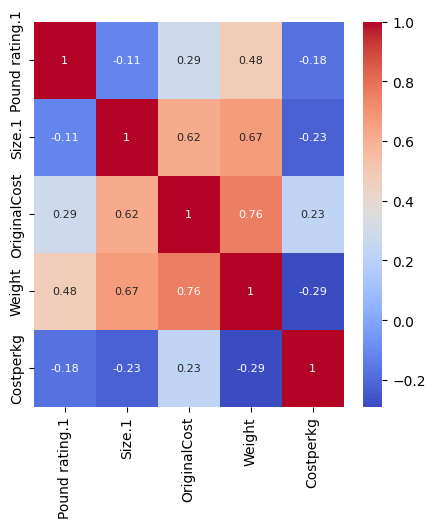

In [ ]:
plt.figure(figsize = (5, 5))

sns.heatmap(
    df.corr(),
    cmap = 'coolwarm',
    annot = True,
    annot_kws = {"size": 8}
)

👉 `Costs` is mainly affected by the `Weight, Size, and Pound Rating` (In that order)

### Material vs Cost Scatter Diagram

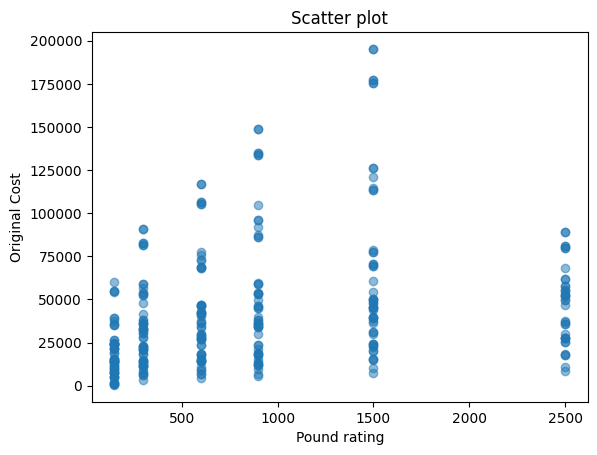

In [ ]:
#Size feature set and target
X_2 = df[['Pound rating.1']]
y = df['OriginalCost']

# Plot!
plt.scatter(X_2, y, alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('Pound rating')
plt.ylabel('Original Cost')
plt.show()

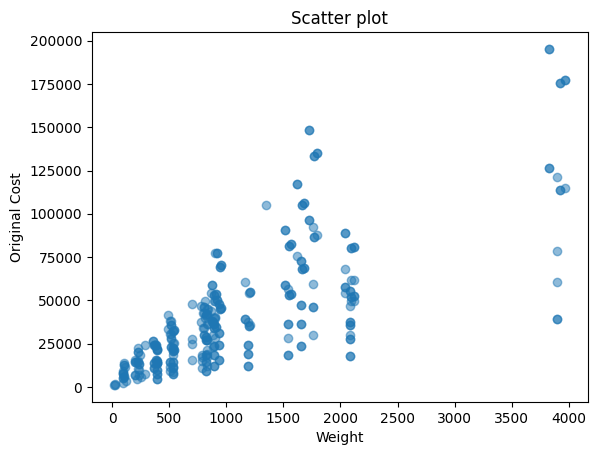

In [ ]:
#Material feature set and target
X_1 = df[['Weight']]
y = df['OriginalCost']

# Plot!
plt.scatter(X_1, y, alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('Weight')
plt.ylabel('Original Cost')
plt.show()

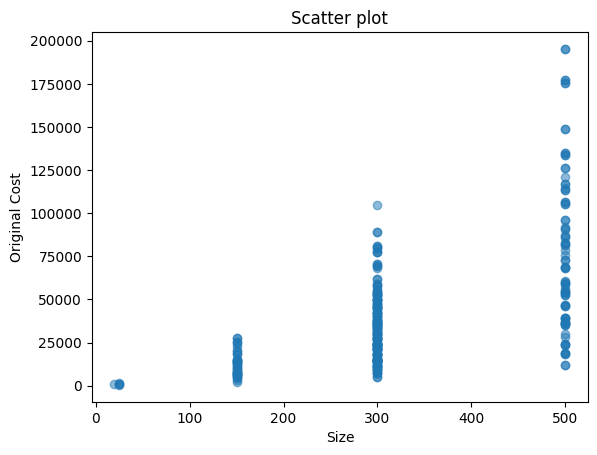

In [ ]:
#Size feature set and target
X_2 = df[['Size.1']]
y = df['OriginalCost']

# Plot!
plt.scatter(X_2, y, alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('Size')
plt.ylabel('Original Cost')
plt.show()

In [ ]:
# #Pound Rating feature set and target
# X_3 = material_df[['Pound rating.1']]
# y = material_df['Original cost [Original Cost]']

# # Plot!
# plt.scatter(X_3, y, alpha=0.5)
# plt.title('Scatter plot')
# plt.xlabel('Pound rating')
# plt.ylabel('Original Cost')
# plt.show()

## Building a Machine learning Cost model

In [ ]:
df.head(3)

,ValveType,Flange type,Connection,Material,Pound rating,Size.1,OriginalCost,Weight,Costperkg
0,Ball,FB,BW,CS,150#,150,4946.877473,92.8,53.306869
1,Ball,FB,BW,CS,300#,150,5936.814499,105.0,56.541090
2,Ball,FB,BW,CS,600#,150,6595.855103,200.0,32.979276


### Main DataFrame (Categorigal and Numerical features)

In [ ]:
df

,ValveType,Flange type,Connection,Material,Pound rating,Size.1,OriginalCost,Weight,Costperkg
0,Ball,FB,BW,CS,150#,150,4946.877473,92.8,53.306869
1,Ball,FB,BW,CS,300#,150,5936.814499,105.0,56.541090
2,Ball,FB,BW,CS,600#,150,6595.855103,200.0,32.979276
3,Ball,FB,BW,CS,900#,150,6926.714581,232.0,29.856528
4,Ball,FB,BW,CS,1500#,150,10224.651368,227.0,45.042517
...,...,...,...,...,...,...,...,...,...
315,Ball,FB,BW,Hasteloy,600#,300,77500.000000,900.0,NaN
316,Ball,FB,BW,Hasteloy,900#,300,105000.000000,1350.0,NaN
317,Ball,FB,BW,Titanium,150#,300,25000.000000,700.0,NaN
318,Ball,FB,BW,Titanium,300#,300,27500.000000,700.0,NaN


### Encode Categorical features

In [ ]:
# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df)

In [ ]:
df_encoded

,Size.1,OriginalCost,Weight,Costperkg,ValveType_Ball,Flange type_FB,Flange type_RB,Connection_BW,Connection_Flanged RF,Connection_Flanged RT,...,Material_SS,Material_SS304,Material_SS316,Material_Titanium,Pound rating_150#,Pound rating_1500#,Pound rating_2500#,Pound rating_300#,Pound rating_600#,Pound rating_900#
0,150,4946.877473,92.8,53.306869,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,150,5936.814499,105.0,56.541090,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,150,6595.855103,200.0,32.979276,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,150,6926.714581,232.0,29.856528,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,150,10224.651368,227.0,45.042517,1,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,300,77500.000000,900.0,NaN,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
316,300,105000.000000,1350.0,NaN,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
317,300,25000.000000,700.0,NaN,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
318,300,27500.000000,700.0,NaN,1,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


### Impute Missing Costs

In [ ]:
# Select the columns containing missing values
columns_with_missing_values = ['Weight', 'Costperkg']

# Create an instance of the IterativeImputer class
# imputer = IterativeImputer(estimator=LinearRegression(), random_state=0)
imputer = SimpleImputer(strategy='mean')


# Fit and transform the dataset by imputing the missing values
df_imputed = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)

# Extract the imputed values for the columns with missing values
imputed_values = df_imputed[columns_with_missing_values]

# Replace the missing values in the original DataFrame
df[columns_with_missing_values] = imputed_values

In [ ]:
df.tail(50)

,ValveType,Flange type,Connection,Material,Pound rating,Size.1,OriginalCost,Weight,Costperkg
270,Ball,FB,Flanged RT,Duplex,300#,500,90905.448014,1510.580000,60.179168
271,Ball,FB,Flanged RT,Duplex,600#,500,117153.873994,1618.480000,72.385123
272,Ball,FB,Flanged RT,Duplex,900#,500,148647.446010,1726.370000,86.104048
273,Ball,FB,Flanged RT,Duplex,1500#,500,195250.381416,3825.480000,51.039446
274,Ball,FB,Flanged RTJ,SS304,150#,500,54221.093100,1197.580000,45.275550
275,Ball,FB,Flanged RTJ,SS304,300#,500,81654.242417,1549.810000,52.686615
276,Ball,FB,Flanged RTJ,SS304,600#,500,105231.378942,1660.510000,63.372927
277,Ball,FB,Flanged RTJ,SS304,900#,500,133519.956649,1771.220000,75.383045
278,Ball,FB,Flanged RTJ,SS304,1500#,500,175380.200983,3924.850000,44.684561
279,Ball,FB,Flanged RTJ,SS316,150#,500,54876.568725,1211.230000,45.306481


### Split the dataset into Train and Test datasets

In [ ]:
# Split the dataset into features (X) and target variable (y)
features = df.drop(['OriginalCost'], axis=1)
target = df['OriginalCost']

In [ ]:
# Encode categorical variables using one-hot encoding
features_encoded = pd.get_dummies(features)

In [ ]:
# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

### USING THE KNN MODEL

In [ ]:
X = X_train
y = y_train

# Instanciate the KNN model
knn_model = KNeighborsRegressor()
# Train the model on the scaled Training data
cv_results = cross_validate(knn_model, X,y)

base_knn_score = cv_results['test_score'].mean()

base_knn_score

0.7458914330427246

In [ ]:
# Rescaling
scaler = MinMaxScaler()

X_rescaled = scaler.fit_transform(X)

cv_results = cross_validate(knn_model, X_rescaled,y)

rescaled_score = cv_results['test_score'].mean()

rescaled_score

0.7376424613117344

### Evaluate the best K Value

In [ ]:
score = []
neighbours = []

for k in range(1,25):

    # Instanciate the model
    knn_model = KNeighborsRegressor(n_neighbors = k)

    # Train the model on the scaled Training data
    cv_results = cross_validate(knn_model, X_rescaled,y)

    # Append the score and k
    score.append(cv_results['test_score'].mean())
    neighbours.append(k)

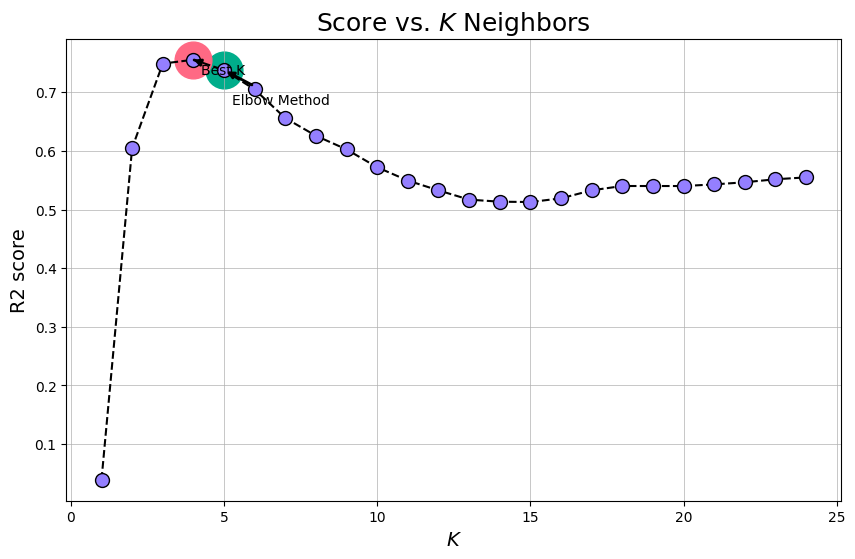

In [ ]:
# Plot the evolution of the score below

with plt.style.context('seaborn-deep'):
    # figsize
    plt.figure(figsize=(10,6))
    # getting axes
    ax = plt.gca()
    # plotting
    ax.plot(range(1,25),score,color='black', linestyle='dashed', marker='o',markerfacecolor='#947FFF', markersize=10)
    # more
    ax.set_title('Score vs. $K$ Neighbors', fontsize = 18)
    ax.set_xlabel('$K$', fontsize = 14)
    ax.set_ylabel('R2 score', fontsize = 14)
    ax.grid(axis="x",linewidth=0.5)
    ax.grid(axis="y",linewidth=0.5)
    # best K
    # focusing
    ax.scatter(5,score[5-1],c='#00ad8b',s=700)
    ax.scatter(4,score[4-1],c='#ff6984',s=700)

    # annotate
    ax.annotate("Elbow Method",
                xy=(5,score[5-1]),
                xytext=(5+0.25,score[6-1]-0.025),
                arrowprops=dict(arrowstyle='-|>',
                                fc="k",
                                ec="k",
                                lw=2),
                bbox=dict(pad=5, facecolor="none", edgecolor="none")
               )

    ax.annotate("Best K",
            xy=(4,score[4-1]),
            xytext=(4+0.25,score[4-1]-0.025),
            arrowprops=dict(arrowstyle='-|>',
                            fc="k",
                            ec="k",
                            lw=2),
            bbox=dict(pad=5, facecolor="none", edgecolor="none")
           )


    plt.show()

In [ ]:
best_k = 4

In [ ]:
# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(estimator = KNeighborsRegressor(n_neighbors=best_k),
                                                              X = X_rescaled,
                                                              y = y,
                                                              train_sizes = [50,100,150,200,224],
                                                              cv = 10,
                                                              scoring = 'r2')

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

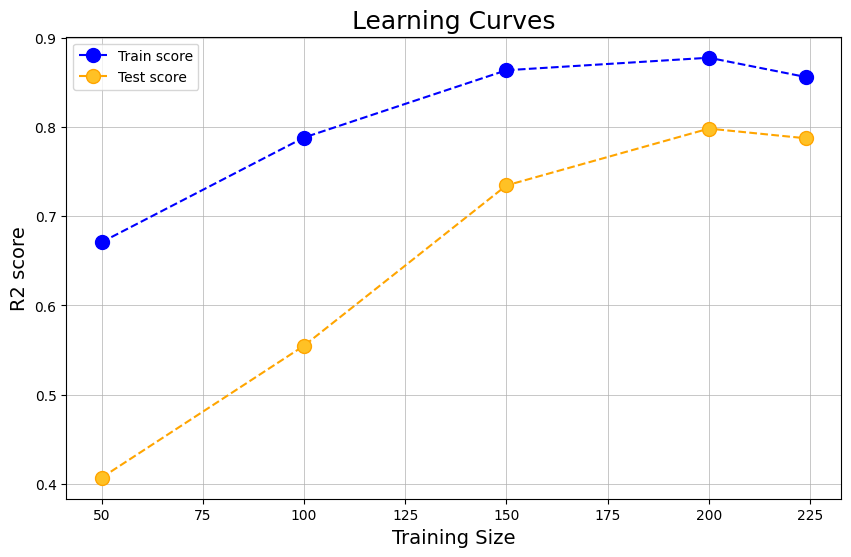

In [ ]:
# Plot the learning curves

import matplotlib.pyplot as plt

with plt.style.context('seaborn-deep'):
    # figsize
    plt.figure(figsize=(10,6))
    # getting axes
    ax = plt.gca()
    # plotting
    ax.plot(train_sizes, train_scores_mean, label = 'Train score',color='blue', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
    ax.plot(train_sizes, test_scores_mean, label = 'Test score',color='orange', linestyle='dashed', marker='o',markerfacecolor='#ffc125', markersize=10)
    # more
    ax.set_title('Learning Curves', fontsize = 18)
    ax.set_xlabel('Training Size', fontsize = 14)
    ax.set_ylabel('R2 score', fontsize = 14)
    ax.grid(axis="x",linewidth=0.5)
    ax.grid(axis="y",linewidth=0.5)
    ax.legend(loc="best")

    plt.show()

In [ ]:
cv_results = cross_validate(KNeighborsRegressor(n_neighbors=best_k), X_rescaled,y, scoring = 'neg_mean_absolute_error')

price_error = cv_results['test_score'].mean()

price_error

-11324.770950224582

In [ ]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression() # Instanciate Linear Regression

cv_results_linear = cross_validate(lin_model, X_rescaled,y_train, scoring = 'neg_mean_absolute_error') # Cross validate

linear_model_score = cv_results_linear['test_score'].mean()  # Mean of scores

print(linear_model_score)

best_model = "KNN"

-221370446012435.94


### Train the model

In [ ]:
# Create and fit the KNeighborsRegressor model
model = KNeighborsRegressor(n_neighbors=best_k)
model.fit(X, y)

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Compute the mean of the scores (note the negative sign due to neg_mean_squared_error)
mean_score = -scores.mean()
### Evaluate Perfomance of model



In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

### Plot Predictions vs Actual values

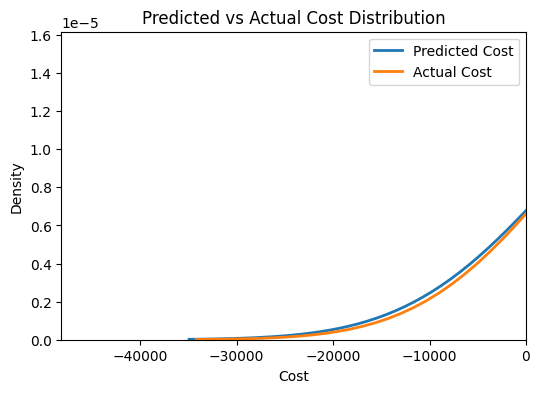

In [ ]:
plt.figure(figsize=(6, 4))  # Adjust the figure size

sns.kdeplot(y_pred, label='Predicted Cost', linewidth=2)  # Increase the linewidth
sns.kdeplot(y_train, label='Actual Cost', linewidth=2)  # Increase the linewidth

plt.legend()
plt.xlim(xmax=50)  # Adjust the x-axis limit

plt.xlabel('Cost')
plt.ylabel('Density')
plt.title('Predicted vs Actual Cost Distribution')

plt.show()

### Make Predictions

In [ ]:
sample_data = pd.read_excel(valves_path, sheet_name= 1, usecols="A:N", skiprows=0)


<ipython-input-33-b4b818b9413f>:1: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  sample_data = pd.read_excel(valves_path, sheet_name= 1, usecols="A:N", skiprows=0)


In [ ]:
sample_data=sample_data.drop(['Description ',
                          'Pound rating.1',
                          'Size',
                          'Costperkg',
                          'OriginalCost'], axis=1)

In [ ]:
sample_data.head()

,ValveType,Connection,Material,Pound rating,Size.1,Weight
0,Ball,BW,Alloy20,150#,150,95.56
1,Ball,BW,Alloy20,300#,150,108.12
2,Ball,BW,Alloy20,600#,150,205.94
3,Ball,BW,Alloy20,900#,150,238.89
4,Ball,BW,Alloy20,1500#,150,233.74


In [ ]:
sample_df = pd.DataFrame(sample_data)
sample_encoded = pd.get_dummies(sample_df)

In [ ]:
sample_encoded

,Size.1,Weight,ValveType_Ball,Connection_BW,Connection_Flanged RF,Connection_Flanged RT,Connection_Flanged RTJ,Material_Alloy20,Material_Hasteloy,Material_Titanium,Pound rating_150#,Pound rating_1500#,Pound rating_2500#,Pound rating_300#,Pound rating_600#,Pound rating_900#
0,150,95.56,1,1,0,0,0,1,0,0,1,0,0,0,0,0
1,150,108.12,1,1,0,0,0,1,0,0,0,0,0,1,0,0
2,150,205.94,1,1,0,0,0,1,0,0,0,0,0,0,1,0
3,150,238.89,1,1,0,0,0,1,0,0,0,0,0,0,0,1
4,150,233.74,1,1,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,500,4416.69,1,0,0,1,0,0,1,0,0,1,0,0,0,0
183,500,884.18,1,0,0,1,0,0,0,1,0,0,0,1,0,0
184,500,947.34,1,0,0,1,0,0,0,1,0,0,0,0,1,0
185,500,1010.49,1,0,0,1,0,0,0,1,0,0,0,0,0,1


In [ ]:
# Ensure that the sample data includes all the necessary feature columns used during model training
# Add missing feature columns with default values of 0
missing_columns = set(features_encoded.columns) - set(sample_encoded.columns)
for col in missing_columns:
    sample_encoded[col] = 0


In [ ]:
# Reorder the columns of the sample data to match the order used during model training
sample_encoded = sample_encoded[features_encoded.columns]

In [ ]:
cost_predictions = model.predict(sample_encoded)
print("Predicted Cost:", cost_predictions)

Predicted Cost: [  4860.06657418   4860.06657418   5889.82790974   6757.86301815
   6757.86301815  19426.37119856   4860.06657418   4860.06657418
   5889.82790974   8453.91035869   8453.91035869  19426.37119856
   4860.06657418   4860.06657418   4860.06657418   4860.06657418
   4860.06657418  13345.29563096   6675.8962402    8671.82192439
  12956.4724798   14247.62702509  13740.5412819   54058.24011864
   6675.8962402   10053.57400313  15117.0197803   19856.40816821
  25206.3867134   54058.24011864   5889.82790974  16286.704178
  12356.38792414  12356.38792414   8788.88895536  38700.61970298
   6675.8962402    8671.82192439  12956.4724798   14247.62702509
  13740.5412819   54058.24011864   6675.8962402   10053.57400313
  15117.0197803   19856.40816821  25206.3867134   54058.24011864
   5889.82790974  16286.704178    12356.38792414  12356.38792414
   8788.88895536  38700.61970298   4860.06657418   4860.06657418
   5889.82790974   8453.91035869   8453.91035869  19426.37119856
   4860.066

In [ ]:
# Predicted cost values
sample_df['Predicted_Cost'] = model.predict(sample_encoded)

In [ ]:
sample_df.head(50)

,ValveType,Connection,Material,Pound rating,Size.1,Weight,Predicted_Cost
0,Ball,BW,Alloy20,150#,150,95.56,4860.066574
1,Ball,BW,Alloy20,300#,150,108.12,4860.066574
2,Ball,BW,Alloy20,600#,150,205.94,5889.827910
3,Ball,BW,Alloy20,900#,150,238.89,6757.863018
4,Ball,BW,Alloy20,1500#,150,233.74,6757.863018
5,Ball,BW,Alloy20,2500#,150,545.74,19426.371199
6,Ball,BW,Hasteloy,150#,150,105.10,4860.066574
7,Ball,BW,Hasteloy,300#,150,118.92,4860.066574
8,Ball,BW,Hasteloy,600#,150,226.50,5889.827910
9,Ball,BW,Hasteloy,900#,150,262.74,8453.910359


### Import to excel

In [ ]:
# Specify the file path and name for the Excel file
file_path = "Predicted_costs.xlsx"

# Save the DataFrame to an Excel file
sample_df.to_excel(file_path, index=False)

print("DataFrame saved to Excel successfully.")



DataFrame saved to Excel successfully.
